### Step 1. Open the data file and study the general information

In [ ]:
import pandas as pd
data=pd.read_csv('/datasets/games.csv')
#print(data.head(10))
print(data.info)
print(data.duplicated().sum())
print(data.isnull().sum())
print(data.dtypes)

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

1. The data has 16715 rows and 11 columns. 
2. There are no duplicate values in the data.
3. There are 2 missing values in Name and gener. These rows can be deleted as the no is very small compared to full dataset.
4. The missing values in Critic_score, user_score and rating columns are very high hence we have to find a way to fill these null values.

### Step 2. Prepare the data

In [ ]:
#Replacing column names with lwercase values
data.columns=data.columns.str.lower()

#Deleting 2 null values in name column
data.dropna(subset=['name'], inplace=True)
print(data.dtypes)

#Handling missing values and changing data types
data['year_of_release']=data['year_of_release'].fillna(0).astype('int')
data['critic_score']=data['critic_score'].fillna(-1).astype('int')
print(len(data.loc[data['user_score']=='tbd']))
data.loc[data['user_score']=='tbd','user_score']=-1
data['user_score']=data['user_score'].fillna(-1).astype('float')

#Adding total sales column
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
print(data.head())


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object
2424
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77            -1       

1. Changed column names to lower case
2. Deleted 2 null values in 'name' column as the no is very small
3. Changed data type for year_of_release column to int type since the column holds release year
4. Changed critic score to int type as it holds integer values. Null values are replaced with -1.
5. Changed user_score to float type because it contains float values. In this column, I considered 'tdb' as null values. Hence all null values and 'tbd' was replaced with -1. 
6. Considering null values shift the mean and median, hence filled them with -1, which can be easily filtered out while doing further analysis.

Missing values in critic_score and user_score column could be because of:
1. Either the release year is old and hence the data is not available
2. The album is very recent release, hence the score is not yet generated

### Step 3. Analyze the data

#### 3a. Look at how many games were released in different years. Is the data for every period significant?

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


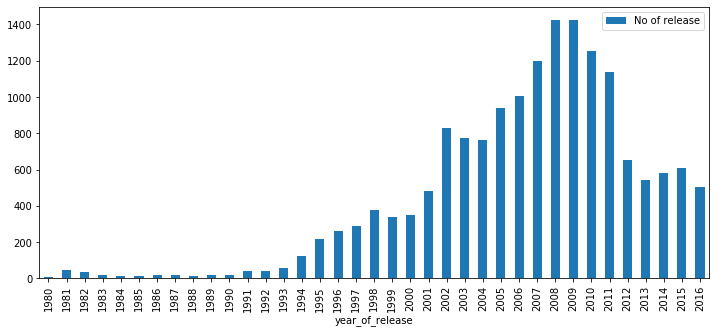

In [ ]:
data_by_year=data.query('year_of_release>0').groupby('year_of_release')['name'].count()
print(data_by_year)
data_by_year.plot(kind='bar', x='year_of_release', y='name', figsize=(12,5), label='No of release', legend=True)

1. The no of games released were significantly low before 2000. The no significantly increased from 2002 with maximum no of releases in 2008 and 2009. However the no of releases again declined in 2012.

#### 3b.Look at how sales varied from platform to platform (Identifying the top platforms based on total sales)

In [ ]:
data_by_platform=data.groupby('platform')['total_sales'].sum().reset_index()
data_by_platform=data_by_platform.sort_values(by='total_sales', ascending=False)
print(data_by_platform)

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


#### 3b.Plotting bar charts for platforms with top5 total_sales

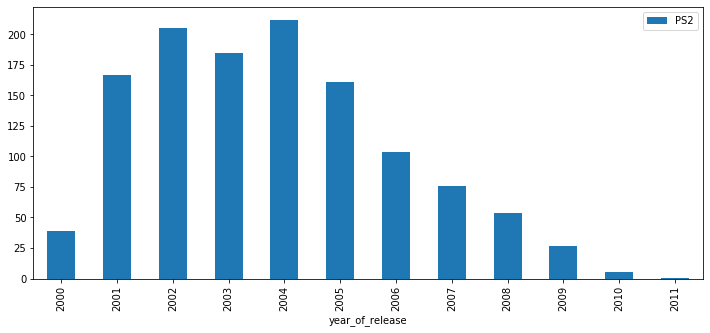

In [ ]:
data_ps2=data.query('platform=="PS2" and year_of_release>0').groupby('year_of_release')['total_sales'].sum()
data_ps2.plot(kind='bar', x='year_of_release', y='total_sales', figsize=(12,5), label='PS2', legend=True)


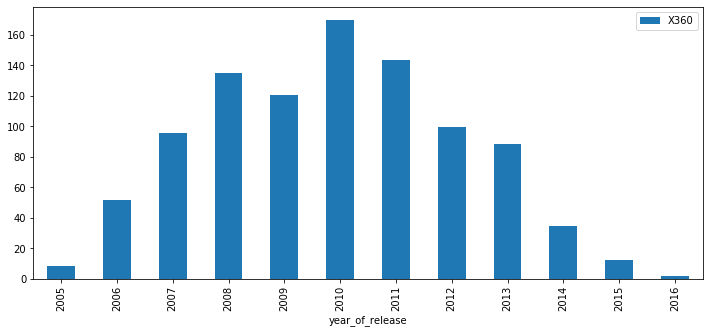

In [ ]:
data_x360=data.query('platform=="X360" and year_of_release>0').groupby('year_of_release')['total_sales'].sum()
data_x360.plot(kind='bar', x='year_of_release', y='total_sales', figsize=(12,5), label='X360', legend=True)


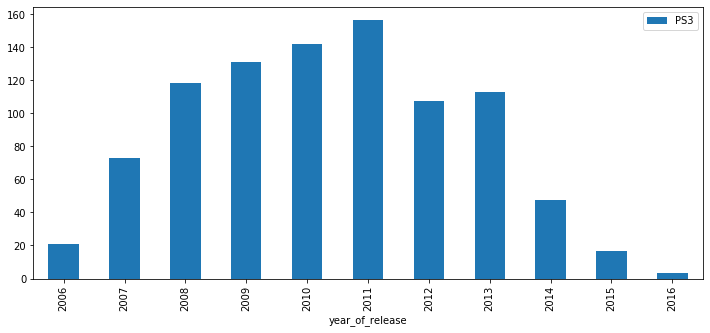

In [ ]:
data_ps3=data.query('platform=="PS3" and year_of_release>0').groupby('year_of_release')['total_sales'].sum()
data_ps3.plot(kind='bar', x='year_of_release', y='total_sales', figsize=(12,5), label='PS3', legend=True)

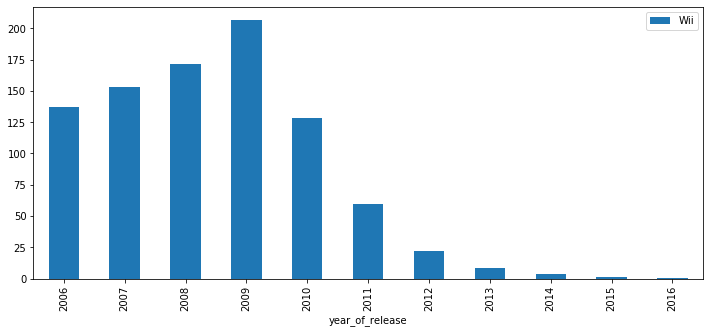

In [ ]:
data_wii=data.query('platform=="Wii" and year_of_release>0').groupby('year_of_release')['total_sales'].sum()
data_wii.plot(kind='bar', x='year_of_release', y='total_sales', figsize=(12,5), label='Wii', legend=True)

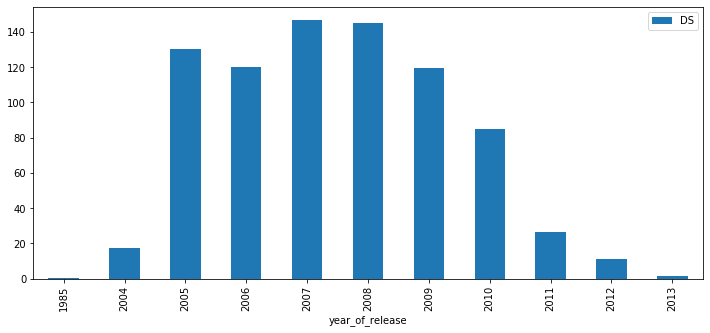

In [ ]:
data_ds=data.query('platform=="DS" and year_of_release>0').groupby('year_of_release')['total_sales'].sum()
data_ds.plot(kind='bar', x='year_of_release', y='total_sales', figsize=(12,5), label='DS', legend=True)

#### 3b.Finding platforms that used to be popular but now have zero sales.

In [ ]:
data_top10=data_by_platform['platform'].head(10)
data_by_platform_year=data.query('platform in @data_top10 and year_of_release>0').pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum')
print(data_by_platform_year)

year_of_release  1985  1988  1992   1994   1995   1996    1997    1998  \
platform                                                                 
DS               0.02   NaN   NaN    NaN    NaN    NaN     NaN     NaN   
GBA               NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN   
PC               0.04  0.03  3.03  12.87   4.22  10.58   11.27    3.26   
PS                NaN   NaN   NaN   6.03  35.96  94.70  136.17  169.49   
PS2               NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN   
PS3               NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN   
PS4               NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN   
PSP               NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN   
Wii               NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN   
X360              NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN   

year_of_release    1999   2000  ...    2007    2008    2009    2010    2011  \
platform                        

1. The bar plots for the top5 pltaforms show that it takes approx. 10 years for a new platform to emerge and the old ones to fade out. However one exception to this is PC platfrom which is existing from 1985 and still has sales in 2016.
2. Of the top10 total sales platforms, PS4 is the latest launch (in 2013) and has significant sales in 2016. Rest all others have minimum or no sales. PS3 also has some sales, but the sales are declining with the launch of PS4. 

#### 3c.Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

1. Based on the no of games released in different years, data should be considered from year 2001. Before 2001, the no of releases were very low.

#### 3d. Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [ ]:
data_new=data.query('year_of_release>2000')

#### 3e.Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [ ]:
data_pivot=data_new.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum', fill_value=0)
data_pivot['p2014']=data_pivot[2014]/data_pivot[2014].sum()
data_pivot['p2015']=data_pivot[2015]/data_pivot[2015].sum()
data_pivot['p2016']=data_pivot[2016]/data_pivot[2016].sum()
print(data_pivot)

year_of_release    2001    2002    2003    2004    2005    2006    2007  \
platform                                                                  
3DS                0.00    0.00    0.00    0.00    0.00    0.00    0.00   
DC                 1.07    0.29    0.00    0.00    0.00    0.00    0.02   
DS                 0.00    0.00    0.00   17.27  130.14  119.81  146.94   
GB                 9.24    0.00    0.00    0.00    0.00    0.00    0.00   
GBA               61.53   74.16   56.67   77.91   33.86    5.28    3.40   
GC                26.34   51.81   50.61   28.82   27.62   11.26    0.27   
N64                3.25    0.08    0.00    0.00    0.00    0.00    0.00   
PC                 5.47    8.57    8.84   10.39    4.37    2.85    9.28   
PS                35.59    6.67    2.07    0.00    0.00    0.00    0.00   
PS2              166.43  205.38  184.31  211.81  160.66  103.42   75.99   
PS3                0.00    0.00    0.00    0.00    0.00   20.96   73.19   
PS4                0.00  

- 53% sales in 2016 comes from PS4 platform followed by XOne (20%) and 3DS (11.6%). The data for 2016 is not complete, hence calculated the %contribution of different platforms in 2015 sales and the trends are similar to 2016. Except for PS4 and XOne, sales of other platfroms are decreasing in 2015 and 2016.

#### 3f. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

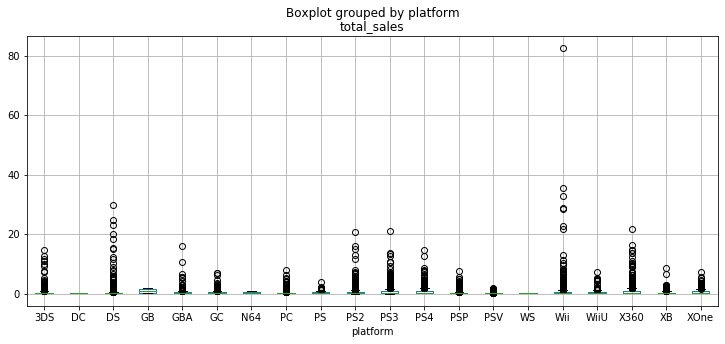

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data_new.boxplot(by='platform', column=['total_sales'], grid=True, figsize=(12,5))

Plotting the boxplot for individual game sales is difficult to read as most of the games have sales between 0 to 2 million USD. Hence plotting the boxplot again removing outliers.

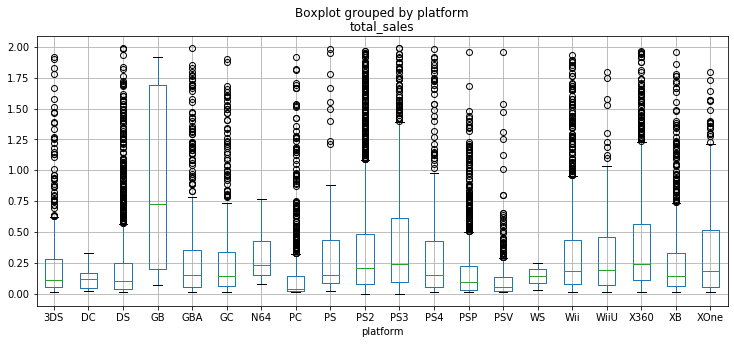

In [ ]:
data_out=data_new.query('total_sales<2')
data_out.boxplot(by='platform', column=['total_sales'], grid=True, figsize=(12,5))

The boxplot shows that for most of the platforms, 75% values are below 0.5 million USD. 95% values in the data are below 2 million USD.

In [ ]:
print(data_new.pivot_table(index='platform', values='total_sales'))

          total_sales
platform             
3DS          0.503535
DC           0.129091
DS           0.378660
GB           0.924000
GBA          0.386185
GC           0.362970
N64          0.333000
PC           0.220945
PS           0.388860
PS2          0.584054
PS3          0.713124
PS4          0.801378
PSP          0.242691
PSV          0.125431
WS           0.140000
Wii          0.692986
WiiU         0.559116
X360         0.780227
XB           0.312444
XOne         0.645020


The average sales vary among different platforms. The average varies from 0.1 million USD to 0.9 million USD. The platfroms with top sales, PS2, PS3, X360, Wii have average sales in the range of 0.5-0.8 million USD. However platform GB which is not in top 10, has much higher average sales because of outliers.

#### 3g. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

0.3929255725800446
0.16967010794637444


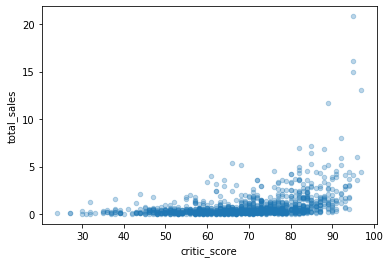

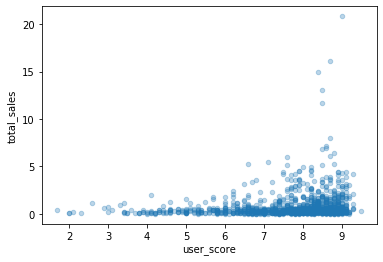

In [ ]:
data_new1_ps2=data_new.query('platform=="PS2" and critic_score>-1')
data_new1_ps2.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
data_new2_ps2=data_new.query('platform=="PS2" and user_score>-1')
data_new2_ps2.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
print(data_new1_ps2['total_sales'].corr(data_new1_ps2['critic_score']))
print(data_new2_ps2['total_sales'].corr(data_new1_ps2['user_score']))

I selected the PS2 platfrom because it has the maximum total_sales.

The Pearson correlation between total_sales and critic_score is 0.39 while the coefficient between total_sales and user_score is 0.16. This implies that total_sales is not dependent on critic_score or user_score. We can also see from the scatter plot that, even if the critic_score and user_score increases, most of the sales are around 0. However, we can also see that most of the outliers only exist at high critic_score and user_score. This shows that certian games with very high critic_score and user_score only have very high sales.

#### 3h.Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [ ]:
data_new_ps2=data_new.query('platform=="PS2"').sort_values(by='total_sales', ascending=False).head(10)
print(data_new_ps2)
data_top5=data_new_ps2['name'].head(5)
print(data_top5)

                              name platform  year_of_release         genre  \
17   Grand Theft Auto: San Andreas      PS2             2004        Action   
24     Grand Theft Auto: Vice City      PS2             2002        Action   
28          Gran Turismo 3: A-Spec      PS2             2001        Racing   
38            Grand Theft Auto III      PS2             2001        Action   
48                  Gran Turismo 4      PS2             2004        Racing   
84                 Final Fantasy X      PS2             2001  Role-Playing   
102     Need for Speed Underground      PS2             2003        Racing   
113   Need for Speed Underground 2      PS2             2004        Racing   
114      Medal of Honor: Frontline      PS2             2002       Shooter   
132                 Kingdom Hearts      PS2             2002  Role-Playing   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
17       9.43      0.40      0.41        10.57            95     

In [ ]:
print(data_new.query('name in @data_top5').pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum', fill_value=0))

platform                         PC    PS2  X360    XB
name                                                  
Gran Turismo 3: A-Spec         0.00  14.97  0.00  0.00
Gran Turismo 4                 0.00  11.65  0.00  0.00
Grand Theft Auto III           0.01  13.10  0.00  0.00
Grand Theft Auto: San Andreas  0.97  20.81  0.11  1.96
Grand Theft Auto: Vice City    0.04  16.15  0.00  0.00


- In the list of top5 sales games, only Grand Theft Auto games exist on other platforms apart from PS2. However the sales are very less in other platforms.

#### 3i.Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

           genre      sum  count      mean       std
0         Action  1492.18   3035  0.491657  1.139154
1      Adventure   180.78   1178  0.153463  0.360180
2       Fighting   291.64    611  0.477316  0.899890
3           Misc   702.80   1577  0.445656  1.344268
4       Platform   478.37    696  0.687313  1.932122
5         Puzzle   134.37    467  0.287730  0.878194
6         Racing   541.06    992  0.545423  1.717968
7   Role-Playing   702.17   1271  0.552455  1.377960
8        Shooter   905.87   1109  0.816835  1.752936
9     Simulation   332.04    753  0.440956  1.246459
10        Sports  1089.68   1898  0.574120  2.294477
11      Strategy   106.53    533  0.199869  0.357908


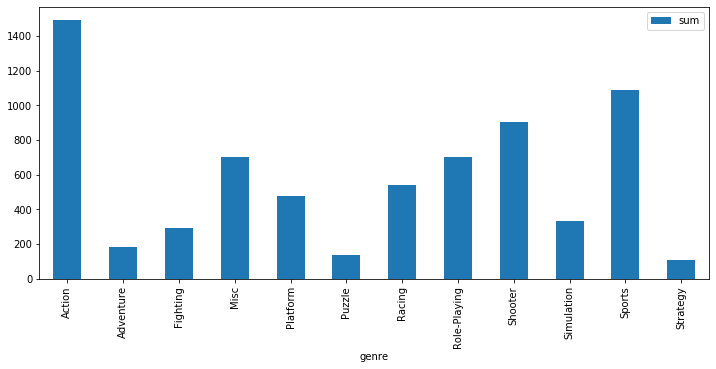

In [ ]:
data_genre=data_new.groupby('genre')['total_sales'].agg(['sum', 'count', 'mean', 'std']).reset_index()
print(data_genre)
data_genre.plot(kind='bar', x='genre', y='sum', figsize=(12,5), legend=True)

1. Data from top5 sales games shows that out of top 5, 3 are from Action genere and 2 belong to racing. Action genre is also the most popular genre has it has more than 3000 games. The count for action genre is much higher then any other genere.
2. The sales distribution bar chart shows that action genere has the maximum sales followed by sports and shooter.Sports also has the 2nd highest game count after action. However one exception is adventure. The no of games in adventure genre is very high but the sales are among the lowest. Henc ethe mean is lowest for adventure genere.
3. Action has the maximum sales, but the mean is highest for shooter and platfrom which means they are the most profitable genres.

### Step 4. Create a user profile for each region

#### 4a.The top five platforms. Describe variations in their market shares from region to region.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data_new['ms_na']=data_new['na_sales']/data_new['na_sales'].sum()
data_new['ms_eu']=data_new['eu_sales']/data_new['eu_sales'].sum()
data_new['ms_jp']=data_new['jp_sales']/data_new['jp_sales'].sum()
data_new['ms_oth']=data_new['other_sales']/data_new['other_sales'].sum()
print(data_new.groupby('platform')[('na_sales','ms_na')].sum().sort_values(by='na_sales', ascending=False).head(5))
print(data_new.groupby('platform')[('eu_sales','ms_eu')].sum().sort_values(by='eu_sales', ascending=False).head(5))
print(data_new.groupby('platform')[('jp_sales','ms_jp')].sum().sort_values(by='jp_sales', ascending=False).head(5))
print(data_new.groupby('platform')[('other_sales','ms_oth')].sum().sort_values(by='other_sales', ascending=False).head(5))

          na_sales     ms_na
platform                    
X360        595.74  0.173427
PS2         556.84  0.162103
Wii         486.87  0.141733
PS3         390.13  0.113571
DS          380.31  0.110713
          eu_sales     ms_eu
platform                    
PS3         327.21  0.160962
PS2         321.99  0.158394
X360        268.32  0.131993
Wii         258.32  0.127073
DS          188.41  0.092683
          jp_sales     ms_jp
platform                    
DS          175.00  0.226376
PS2         128.67  0.166445
3DS         100.62  0.130160
PS3          79.41  0.102723
PSP          75.88  0.098157
          other_sales    ms_oth
platform                       
PS2            186.89  0.260841
PS3            134.59  0.187846
X360            84.88  0.118466
Wii             77.71  0.108459
DS              59.04  0.082402


1. PS2, PS3, X360, Wii and DS are the top 5 platfroms in all regions except for Japan where instead of X360 and Wii, 3DS and PSP are among top 5. 
2. PS2 has more than 15% market share in all the regions with highest in others (26%).
3. PS3 has more than 10% market share in all the regions with highest in others (18%).
4. DS has more than 8% market share in all the regions with highest in Japan (22%).
5. X360 and Wii, both have more than 10% market share in all regions except Japan.

#### 4b. The top five genres. Explain the difference.

In [ ]:
print(data_new.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5))
print(data_new.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5))
print(data_new.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5))
print(data_new.groupby('genre')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5))

           genre  na_sales
0         Action    734.48
10        Sports    566.64
8        Shooter    491.23
3           Misc    358.13
7   Role-Playing    275.10
      genre  eu_sales
0    Action    455.74
10   Sports    329.81
8   Shooter    291.85
3      Misc    191.80
6    Racing    185.52
           genre  jp_sales
7   Role-Playing    225.91
0         Action    128.49
3           Misc     82.66
10        Sports     69.52
4       Platform     52.71
      genre  other_sales
0    Action       173.47
10   Sports       123.71
8   Shooter        99.71
3      Misc        70.21
6    Racing        67.64


1. Action genre is the top sales gener in all the regions except for Japan where role-playing replaces action genre. 
2. Action and sports are among top 5 in all the regions
3. Shooter, racing and role-playing are the other popular genres in the regions.

#### 4c. Do ESRB ratings affect sales in individual regions?

In [ ]:
data_new['rating']=data_new['rating'].fillna('unknown')
data_rating1=data_new.query('rating!="unknown"').groupby('rating')[('na_sales','eu_sales','jp_sales','other_sales')].sum().reset_index()
print(data_rating1)
data_rating2=data_new.query('rating!="unknown"').groupby('rating')[('ms_na','ms_eu','ms_jp','ms_oth')].sum().reset_index()
print(data_rating2)

  rating  na_sales  eu_sales  jp_sales  other_sales
0     AO      1.26      0.61      0.00         0.09
1      E   1225.21    675.38    187.27       226.14
2   E10+    345.50    183.33     40.20        71.92
3     EC      1.53      0.11      0.00         0.11
4      M    725.87    470.66     57.16       173.90
5     RP      0.00      0.03      0.00         0.01
6      T    689.03    379.12    122.63       145.17
  rating     ms_na     ms_eu     ms_jp    ms_oth
0     AO  0.000367  0.000300  0.000000  0.000126
1      E  0.356673  0.332235  0.242248  0.315622
2   E10+  0.100579  0.090184  0.052002  0.100378
3     EC  0.000445  0.000054  0.000000  0.000154
4      M  0.211309  0.231528  0.073941  0.242711
5     RP  0.000000  0.000015  0.000000  0.000014
6      T  0.200585  0.186498  0.158631  0.202613


- The data shows that ratings do impact the sales in the regions:
1. Games with rating AO, EC, RP consistently has low or no sales in all the regions
2. Games with rating E has the highest market share in all the regions followed by rating M and T. 

### Step 5. Test the following hypotheses:

#### 5a. Average user ratings of the Xbox One and PC platforms are the same.

In [ ]:
user_rating_xbox=data_new.query('platform=="XOne" and user_score>-1')['user_score']
user_rating_pc=data_new.query('platform=="PC" and user_score>-1')['user_score']

#H0: The user rating for both the platforms are same
from scipy import stats as st
alpha=0.05
result=st.ttest_ind(user_rating_xbox,user_rating_pc)
print("p-value:", result.pvalue)

if (result.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothsis')

p-value: 5.195035813817873e-05
We reject the null hypothesis


#### 5b. Average user ratings for the Action and Sports genres are different.

In [ ]:
user_rating_action=data_new.query('genre=="Action" and user_score>-1')['user_score']
user_rating_sports=data_new.query('genre=="Sports" and user_score>-1')['user_score']

#H0: The average user rating for action and sports genres are same

alpha=0.05
result=st.ttest_ind(user_rating_action,user_rating_sports)
print("p-value:",result.pvalue)

if (result.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value: 0.06727906596341816
We cannot reject the null hypothesis


1. Null hypothesis assumes there is no difference and alternate hypotheiss is the opposite of null hypothesis. 
2. Level of significance is the probability of rejecting null hypothesis when it is true.5% is usually the approprite level of significane, not too low (as for 1%) and not too high (as for 10%). 

Hypotheiss testing shows that average user rating for XOne and PC are not same. The p-value for the test is 0.005% i.e. the probabilty of the observed difference between the mean of the two platfroms is only 0.005% which is much lower than alpha. Hence we reject the null hypothesis.

Hypothesis testing shows that average user rating for action and sports genres are same. The probabilty of the observed difference between the two means of action and sports genere is 6.7% which is higher than alpha. Hence we cannot reject the null hypothesis.

### Step 6. Write a general conclusion

#### Overall Conclusion:

1. Based on the data analysis, it appears that the Japan market is very different as compared to the rest of the regions. The geners and platforms popular in Japan are different from other regions.
2. Action gener is the most popular genre with maximum no of games folowed by Sports genre. However, shooter and platfrom are the most profitable ones with highest average sales per game.
3. Most of the games have the total sales in the range of 0-2 million USD. However there are some games with sales above 20 million USD. Maximum sales for a game is 82.5 million USD.
4. PS4 and XOne are the latest launches in 2013. PS4 has the maximum market share followed by XOne. Sales for rest of the platforms are decreasing.
5. The sales of the games looks to be independant of the critic score or user score. However ESRB rarting seems to effect the sales.